# Figure Skating in the Olympics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import math
import seaborn as sns

In [2]:
data = pd.read_csv('athlete_events.csv')
noc = pd.read_csv('noc_regions.csv')

Figure skating has been an Olympic sport since the 1908 Summer Olympics. There are a total of 5 events within the category, a solo event for men and women, and 3 paired events. Originally it started as Men's Singles, Women's Singles, and Mixed Pairs, but in 1976 Ice Dancing became an event and in 2014 a Mixed Team event was also created. In this exploratory data analysis we will focus on the single events.

In [3]:
print(data[data['Sport'] == 'Figure Skating'].groupby('Event').Event.count())

Event
Figure Skating Men's Singles            506
Figure Skating Men's Special Figures      3
Figure Skating Mixed Ice Dancing        456
Figure Skating Mixed Pairs              704
Figure Skating Mixed Team                74
Figure Skating Women's Singles          555
Name: Event, dtype: int64


In [4]:
print(data[data['Event'] == "Figure Skating Men's Special Figures"])

           ID                               Name Sex   Age  Height  Weight  \
47130   24288         Arthur Warren Jack Cumming   M  18.0     NaN     NaN   
88830   45041    Geoffrey Norman Edward Hall-Say   M  44.0     NaN     NaN   
123223  62264  Nikolay Aleksandrovich Kolomenkin   M  34.0     NaN     NaN   

                 Team  NOC        Games  Year  Season    City           Sport  \
47130   Great Britain  GBR  1908 Summer  1908  Summer  London  Figure Skating   
88830   Great Britain  GBR  1908 Summer  1908  Summer  London  Figure Skating   
123223         Russia  RUS  1908 Summer  1908  Summer  London  Figure Skating   

                                       Event   Medal  
47130   Figure Skating Men's Special Figures  Silver  
88830   Figure Skating Men's Special Figures  Bronze  
123223  Figure Skating Men's Special Figures    Gold  


Apparently only in 1908, there was an event called Special Figures, where the data only recorded the medalists.

In [5]:
print(data[data['Event'] == 'Figure Skating Mixed Pairs'].groupby(['Year','Team']).ID.count().head(10))

Year  Team           
1908  Germany            2
      Great Britain-1    2
      Great Britain-2    2
1920  Belgium            2
      Finland            2
      France             2
      Great Britain-1    2
      Great Britain-2    2
      Great Britain-3    2
      Norway             2
Name: ID, dtype: int64


We see that the data contains two athlete ID's per team for mixed pairs event.


## Figure Skating:
Figure skating is a sport that focuses on the manipulation of the skater's body weight and balance as they attempt several different elements such as jumps, spins, lifts (for pairs), intricate footwork and turns. Figure skating is usually done inside on an ice rink which allowed it to be present at all Summer Olympic events up until 1992. This also made the sport accessible year round for training and competition for many countries.

Music for these programs historically were limited to instrumental only, however, this has very recently been changed by the International Skating Union(ISU) beginning in 2014. Typically skaters choose their own music for their programs.

The age requirement for figure skating changes by the ISU, but generally starts at a very early age (12 to 15 years old). Most figure skaters retire fairly early too, usually before they reach 30 due to it being a very difficult and demanding competitive sport. 

## Figure Skating Format:
Figure Skating Competitions have two parts: a "short program" which lasts two minutes and fifty seconds and a "long program" (also called free skate) that lasts four minutes and thirty seconds. The short program compromises of a set of elements that a skater must complete, testing their technique and ability to perform certain types of jumps, spins, steps, or more of varying difficulties. The long program gives the skater more freedom for their routine and is focused around performance. For the singles events, there is a limit of 30 participants. Countries can earn up to 3 teams per event, depending on their skaters' placement in the most recent World Figure Skating Championships. Most of the spots are taken in this fashion, but there are other tournaments that could earn entries as well (Nebelhorn Trophy competition).

## How Figure Skating is Scored:
Figure Skating used to be judged on a 6.0 scale. This scale included 3 elements: technical merit(long program), required elements(short program), and presentation(both). Each judge would score separately from each other for each program, and then combined them to rank the skaters. However it has been changed in due to a scandal at the 2002 Winter Olympics Pairs Event due to suspected biased scoring for the gold and silver medalists. It has since been changed to the ISU Judging System (IJS). This system is significantly more complex, including a technical panel for unbiased identification of skating elements, a referee, and a judging panel consisting of 9 people that grade using a combination of Program Component Scores (PCS), and Grade of Execution (GOE). Both of these scoring rubrics are specific on evaluations, and with a combined weighted score, skaters are then ranked. Men at the Olympics score in the mid to high 200's, sometimes getting above 300 (85-100 in short program, 180-200 in long program). Women at the same level of expertise score in the low 200's due to different scaling and the lack of quad's (4 revolutions in their jumps), which score very highly if done correctly, compared to the men's competition. 

In [6]:
print(data.groupby('Sport').Age.mean().sort_values(ascending=True).head())

Sport
Rhythmic Gymnastics      18.737082
Swimming                 20.566803
Figure Skating           22.232190
Synchronized Swimming    22.366851
Diving                   22.481441
Name: Age, dtype: float64


We see that Figure Skating is right below Gymnastics and Swimming for mean age.

In [7]:
mfs = data[data['Event'] == "Figure Skating Men's Singles"]
ffs = data[data['Event'] == "Figure Skating Women's Singles"]

In [8]:
print(mfs.shape,"\n", ffs.shape)

(506, 15) 
 (555, 15)


## Observing some summary statistics

In [9]:
## For Men
print(mfs.mean(), '\n')
print(mfs.median())

ID        68477.148221
Age          22.305221
Height      173.397626
Weight       65.591640
Year       1975.774704
dtype: float64 

ID        67969.0
Age          22.0
Height      174.0
Weight       65.0
Year       1980.0
dtype: float64


In [10]:
## For Women
print(ffs.mean(), '\n')
print(ffs.median())

ID        67936.933333
Age          19.414545
Height      161.313351
Weight       51.119403
Year       1974.850450
dtype: float64 

ID        65847.0
Age          19.0
Height      162.0
Weight       51.0
Year       1976.0
dtype: float64


Reminder that height is in cm and weight is in kg. Below are some graphs that help visualize these features.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


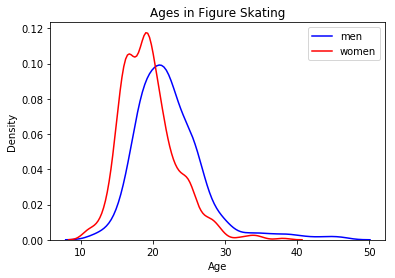

In [11]:
sns.distplot(mfs.Age.dropna(), color = 'blue', hist = False, label='men')
sns.distplot(ffs.Age.dropna(), color = 'red', hist = False, label='women')
plt.ylabel('Density')
plt.title('Ages in Figure Skating')
plt.show()

Pretty hard cutoff by 30 for women, and most women appear to be under twenty years old. Men's age is more normally distributed, with some athletes that compete over 30.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


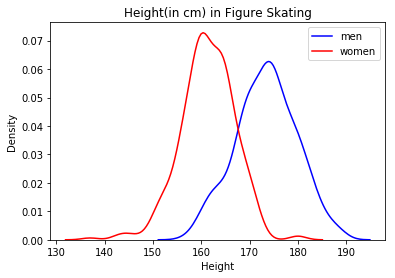

In [12]:
sns.distplot(mfs.Height.dropna(), color = 'blue', hist=False, label = 'men')
sns.distplot(ffs.Height.dropna(), color = 'red', hist=False, label = 'women')
plt.ylabel('Density')
plt.title('Height(in cm) in Figure Skating')
plt.show()

Nothing particularly exciting about this graph. Both genders have normally distributed heights.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


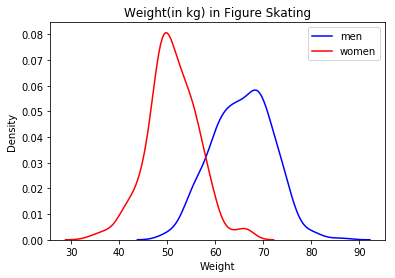

In [13]:
sns.distplot(mfs.Weight.dropna(), color = 'blue', hist=False, label = 'men')
sns.distplot(ffs.Weight.dropna(), color = 'red', hist=False, label = 'women')
plt.ylabel('Density')
plt.title('Weight(in kg) in Figure Skating')
plt.show()

More normal curves.

Are figure skaters potentially underweight for their respective heights/age? One way to test this is with BMI (not the most reliable methods, but possible given our data).

In [14]:
tempm = mfs[['Weight', 'Height']].dropna()
tempf = ffs[['Weight', 'Height']].dropna()
tempm.Height = tempm.Height/100.0
tempf.Height = tempf.Height/100.0
BMIm = tempm.Weight/(tempm.Height*tempm.Height)
BMIf = tempf.Weight/(tempf.Height*tempf.Height)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


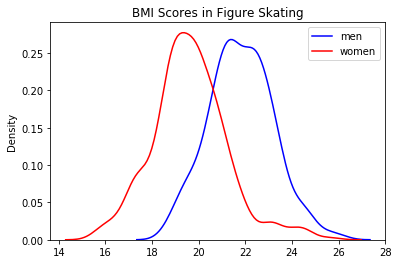

In [15]:
sns.distplot(BMIm, color = 'blue', hist=False, label = 'men')
sns.distplot(BMIf, color = 'red', hist=False, label= 'women')
plt.ylabel('Density')
plt.title('BMI Scores in Figure Skating')
plt.show()

A "healthy" BMI value is considered to be between 18.5 to 24. We can see here that the men mostly fit into that area, but female figure skaters have a lower BMI overall. Could these lower BMI values be associated with what country these athletes are coming from?

In [16]:
tempbmi = ffs.loc[BMIf.index,['Name','Team', 'Age', 'NOC', 'Year', 'Medal']]
tempbmi['BMI'] = BMIf
tempbmi = pd.merge(tempbmi, noc, how='left', on ='NOC')

In [17]:
print(tempbmi.groupby('region').BMI.mean().sort_values(ascending=True).head(10), "\n")
print(tempbmi.groupby('region').BMI.mean().sort_values(ascending=True).tail(10), "\n")

region
Georgia        16.015625
Serbia         17.922430
Estonia        17.998163
Uzbekistan     18.016975
Belgium        18.044094
Croatia        18.101601
South Korea    18.160815
Spain          18.573445
Ukraine        18.824826
Switzerland    18.842865
Name: BMI, dtype: float64 

region
Belarus         20.312500
Sweden          20.339638
UK              20.432662
Italy           20.611400
Canada          20.805123
Latvia          20.820940
North Korea     21.333333
Hungary         22.316915
South Africa    23.046875
Turkey          23.140496
Name: BMI, dtype: float64 



We see that while some countries have good BMI score means, others have a low mean value. 

## Medals Won in Figure Skating

In [18]:
mfs = pd.merge(mfs, noc, how='left', on='NOC')
ffs = pd.merge(ffs, noc, how='left', on='NOC')

### Medals per NOC Committee

In [19]:
## Total medals for men's singles by country
menmedals = mfs.groupby('region').Medal.count().sort_values(ascending=False)
print(menmedals.head(10), "\n\n\n")

## Total medels for women's singles by country
womenmedals = ffs.groupby('region').Medal.count().sort_values(ascending=False)
print(womenmedals.head(10))

region
USA               15
Russia            10
Canada             9
Austria            8
Sweden             7
France             5
Czech Republic     4
Germany            3
Switzerland        3
Japan              2
Name: Medal, dtype: int64 



region
USA            23
Germany         7
Austria         7
UK              6
Canada          5
Russia          4
Sweden          3
Japan           3
Norway          3
Netherlands     3
Name: Medal, dtype: int64


We see some similar countries, such as the USA, Russia, Austria, and Germany that are top competitors for both the men's and women's events.

In [20]:
## Medals won per Rank per Country
print(mfs.groupby(['region', 'Medal']).Medal.count().sort_values(ascending = False).head(15), "\n\n\n\n")
print(ffs.groupby(['region', 'Medal']).Medal.count().sort_values(ascending = False).head(15))

region          Medal 
USA             Gold      7
                Bronze    5
Canada          Silver    5
Russia          Gold      5
Canada          Bronze    4
Sweden          Gold      4
Russia          Silver    4
France          Bronze    4
USA             Silver    3
Austria         Gold      3
                Silver    3
Czech Republic  Bronze    2
Germany         Silver    2
Austria         Bronze    2
Sweden          Silver    2
Name: Medal, dtype: int64 




region       Medal 
USA          Bronze    8
             Silver    8
             Gold      7
Austria      Silver    4
Germany      Gold      3
UK           Bronze    3
Norway       Gold      3
China        Bronze    2
Japan        Silver    2
Germany      Bronze    2
Russia       Bronze    2
Netherlands  Silver    2
Germany      Silver    2
Canada       Bronze    2
UK           Gold      2
Name: Medal, dtype: int64


In [21]:
print(mfs.groupby('Medal').region.nunique(), '\n\n\n')
print(ffs.groupby('Medal').region.nunique())

Medal
Bronze    12
Gold       8
Silver    10
Name: region, dtype: int64 



Medal
Bronze    11
Gold      12
Silver    10
Name: region, dtype: int64


In [22]:
print(mfs.groupby('region').Medal.count().sort_values(ascending=False).head(10), '\n\n\n')
print(ffs.groupby('region').Medal.count().sort_values(ascending=False).head(10))

region
USA               15
Russia            10
Canada             9
Austria            8
Sweden             7
France             5
Czech Republic     4
Germany            3
Switzerland        3
Japan              2
Name: Medal, dtype: int64 



region
USA            23
Germany         7
Austria         7
UK              6
Canada          5
Russia          4
Sweden          3
Japan           3
Norway          3
Netherlands     3
Name: Medal, dtype: int64


In [23]:
## Number of NOC committees participating per event
print(ffs.region.nunique())
print(mfs.region.nunique(), '\n')

## Number of Medals obtained from 1908 to 2014 per event
print(mfs.Medal.count())
print(ffs.Medal.count())

44
44 

72
72


We see that out of 44 countries that compete, very few of them have ever achieved medalists (less than half of them receive any medals at all). For female athletes in particular, the USA alone won almost one third of all possible medals in the singles event  for the entire lifetime of the event at the Olympics.

### Looking at Individual Athletes

In [24]:
## The number of medals won per athlete
m_med = mfs.groupby(['Name', 'Team']).Medal.count()
f_med = ffs.groupby(['Name', 'Team']).Medal.count()
print(m_med.sort_values(ascending=False).head(10), '\n\n\n')
print(f_med.sort_values(ascending=False).head(10))

Name                                   Team         
Gillis Emanuel Grafstrm                Sweden           4
Yevgeny Viktorovich Plyushchenko       Russia           3
Richard Totten "Dick" Button           United States    2
Patrick Henri Pera                     France           2
Philippe Christophe Luciene Candeloro  France           2
Elvis Stojko                           Canada           2
David Wilkinson Jenkins                United States    2
Brian Ernest Orser                     Canada           2
Wilhelm Richard "Willy" Bckl           Austria          2
Karl Martin Alois Schfer               Austria          2
Name: Medal, dtype: int64 



Name                                                Team         
Sonja Henie (-Topping, -Gardiner, -Onstad)          Norway           3
Nancy Ann Kerrigan (-Solomon)                       United States    2
Chen Lu                                             China            2
Yu-Na Kim                                           South 

The highest number of Medals won by an Olympic Figure Skater was 4. We see that it is not too uncommon for figure skaters to attempt multiple years if they were successful previously. 

In [25]:
## The number of Olympics participated in per athlete
m_oly = mfs.groupby(['Name', 'Team']).Year.nunique()
f_oly = ffs.groupby(['Name', 'Team']).Year.nunique()
print(m_oly.sort_values(ascending=False).head(10), '\n\n\n')
print(f_oly.sort_values(ascending=False).head(10))

Name                      Team          
Brian Joubert             France            4
Jan Hoffmann              East Germany      4
Gillis Emanuel Grafstrm   Sweden            4
Elvis Stojko              Canada            4
Jean-Christophe Simond    France            3
Jung Sung-Il              South Korea       3
Steven Cousins            Great Britain     3
Karl Martin Alois Schfer  Austria           3
Ivan Bozhidarov Dinev     Bulgaria          3
Tom Verner                Czech Republic    3
Name: Year, dtype: int64 



Name                                        Team         
Laetitia Hubert                             France           4
Jlia Sebestyn                               Hungary          4
Olena Anatolivna Liashenko                  Ukraine          4
Sonja Henie (-Topping, -Gardiner, -Onstad)  Norway           4
Irina Eduardovna Slutskaya                  Russia           3
Jelena Glebova                              Estonia          3
Elene Gedevanishvili              

It will probably be more interesting to observe the proportion between their medal count and Olympic attempts (their "success rate" at the Olympic Games).

In [26]:
m_attempt = pd.merge(pd.DataFrame(m_med).reset_index(), pd.DataFrame(m_oly).reset_index(), on = 'Name')
f_attempt = pd.merge(pd.DataFrame(f_med).reset_index(), pd.DataFrame(f_oly).reset_index(), on = 'Name')
m_attempt['Prop'] = m_attempt.Medal/m_attempt.Year
f_attempt['Prop'] = f_attempt.Medal/f_attempt.Year

In [27]:
print(m_attempt.loc[:,['Name','Team_x','Medal','Prop']].sort_values(['Prop','Medal'], ascending = False).head(10))

                                      Name         Team_x  Medal  Prop
90                 Gillis Emanuel Grafstrm         Sweden      4   1.0
346       Yevgeny Viktorovich Plyushchenko         Russia      3   1.0
32                      Brian Ernest Orser         Canada      2   1.0
52                 David Wilkinson Jenkins  United States      2   1.0
234                     Patrick Henri Pera         France      2   1.0
250  Philippe Christophe Luciene Candeloro         France      2   1.0
258           Richard Totten "Dick" Button  United States      2   1.0
336           Wilhelm Richard "Willy" Bckl        Austria      2   1.0
9             Aleksey Yevgenyevich Urmanov         Russia      1   1.0
10            Aleksey Yevgenyevich Urmanov         Russia      1   1.0


In [28]:
print(f_attempt.loc[:,['Name','Team_x','Medal','Prop']].sort_values(['Prop','Medal'], ascending = False).head(10))

                                                  Name         Team_x  Medal  \
211                                      Katarina Witt   East Germany      2   
41                  Beatrix Suzetta Loughran (-Harvey)  United States      2   
52                    Carol Elizabeth Heiss (-Jenkins)  United States      2   
123  Friederike "Fritzi" Burger (-Nishikawa-, -Russ...        Austria      2   
181                  Jeannette Eleanor Altwegg (-Wirz)  Great Britain      2   
210                                      Katarina Witt   East Germany      2   
292                     Michelle Wingshan Kwan (-Pell)  United States      2   
306                      Nancy Ann Kerrigan (-Solomon)  United States      2   
383         Tenley Emma Albright (-Gardiner, -Blakely)  United States      2   
413                                          Yu-Na Kim    South Korea      2   

     Prop  
211   2.0  
41    1.0  
52    1.0  
123   1.0  
181   1.0  
210   1.0  
292   1.0  
306   1.0  
383   1.0  

We see that Gillis Emanuel Grafström was the only athlete in figure skating to win 4 medals over 4 Olympic Games. However, there were several strong athletes that came back to the Olympics to win a second medal. We do see some problems though. Aleksey Yevgenyevich Urmanov is listed twice for males, which seems odd. We also see something wrong for Katarina Witt in East Germany. So we need investigate further.

In [29]:
print(data[data['Name'] == 'Aleksey Yevgenyevich Urmanov'].loc[:,['Name','Team','NOC','Year','Medal']], '\n\n\n')

                                Name          Team  NOC  Year Medal
246648  Aleksey Yevgenyevich Urmanov  Unified Team  EUN  1992   NaN
246649  Aleksey Yevgenyevich Urmanov        Russia  RUS  1994  Gold 





It appears Aleksey Yevgenyevich Urmanov was active during the 1992 and 1994 Olympics. In 1992, the United Team was the team for the Soviet Union. By the 1994 Olympics, he was competing for the Russian team. He won 2 medals in his 2 trips, which means he won models from both Olympics he participated in.

In [30]:
print(data[data['Name'] == 'Katarina Witt'].loc[:,['Name','Team','NOC','Year', 'Medal']], '\n\n\n')

                 Name          Team  NOC  Year Medal
262129  Katarina Witt  East Germany  GDR  1984  Gold
262130  Katarina Witt  East Germany  GDR  1988  Gold
262131  Katarina Witt       Germany  GER  1994   NaN 





Because Katarina Witt participiated in Olymipcs from 1984 and 1994,  her Team changed from East Germany to Germany after the reunification of Germany in 1989. From the actual data, we see she participated 3 times, and won 2 medals.

## Participants

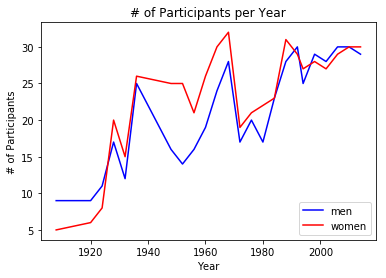

In [31]:
m = pd.DataFrame(mfs.groupby('Year').Name.count()).reset_index()
f = pd.DataFrame(ffs.groupby('Year').Name.count()).reset_index()

#plt.scatter(mfs.Year.unique(), mfs.groupby('Year').Name.count(), color = 'blue')
#plt.scatter(pd.DataFrame(ffs.groupby('Year').Name.count()).reindex())
plt.plot(m['Year'], m['Name'], color = 'blue', label = 'men')
plt.plot(f['Year'], f['Name'], color = 'red', label = 'women')
plt.xlabel('Year')
plt.ylabel('# of Participants')
plt.title('# of Participants per Year')
plt.legend(loc = 'lower right')
plt.show()

We see that the number of competitors in the events shifted drastically, and only stabilized close to above 25 competitors after the year 2000.

In [32]:
m_ppy = pd.DataFrame(mfs.groupby(['Year','region']).Name.nunique()).reset_index()
f_ppy = pd.DataFrame(ffs.groupby(['Year','region']).Name.nunique()).reset_index()

print(m_ppy[m_ppy['Year'] == 2014], '\n\n\n')
print(f_ppy[f_ppy['Year'] == 2014])

     Year          region  Name
306  2014       Australia     1
307  2014         Austria     1
308  2014         Belgium     1
309  2014          Canada     3
310  2014           China     1
311  2014  Czech Republic     2
312  2014         Estonia     1
313  2014          France     2
314  2014         Germany     1
315  2014          Israel     1
316  2014           Italy     1
317  2014           Japan     3
318  2014      Kazakhstan     2
319  2014     Philippines     1
320  2014         Romania     1
321  2014           Spain     2
322  2014          Sweden     1
323  2014             USA     2
324  2014         Ukraine     1
325  2014      Uzbekistan     1 



     Year          region  Name
312  2014       Australia     1
313  2014         Austria     1
314  2014          Brazil     1
315  2014          Canada     2
316  2014           China     2
317  2014  Czech Republic     1
318  2014         Estonia     1
319  2014          France     1
320  2014         Georgia     1
321 

For the 2014 Winter Olympics, Canada, Japan, and the USA brought a lot of members for both events.

In [33]:
m_ppy = m_ppy[m_ppy['Year'] >= 2000]
f_ppy = f_ppy[f_ppy['Year'] >= 2000]

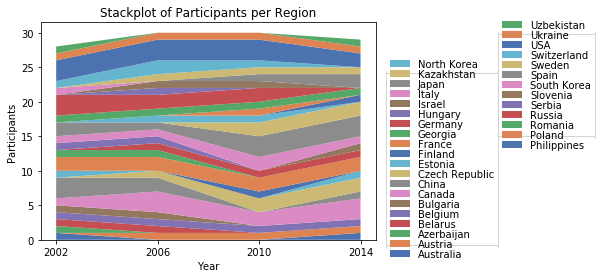

In [34]:
sns.set_palette('deep', 44)
plt.stackplot(m_ppy.pivot('Year','region','Name').index, np.transpose(m_ppy.pivot('Year','region', 'Name').fillna(0)))
l1 = plt.legend(bbox_to_anchor=(1.38, 0), labels = m_ppy.pivot('Year','region','Name').columns[0:20], labelspacing = -2)
l2 = plt.legend(bbox_to_anchor=(1.67,0.5), labels = m_ppy.pivot('Year', 'region', 'Name').columns[20:33], labelspacing = -2)
plt.gca().add_artist(l1)
plt.xlabel('Year')
plt.xticks([2002, 2006, 2010, 2014])
plt.ylabel('Participants')
plt.title('Stackplot of Participants per Region')
plt.show()

We see that in the four most recent Winter Olympics, countries like the USA, Japan, Canada, and France have been able to send multiple athletes for the men's single event. We see other countries such as North Korea, Poland, and Slovenia that were able to participate only once or twice, with only a single athlete representing their country. 

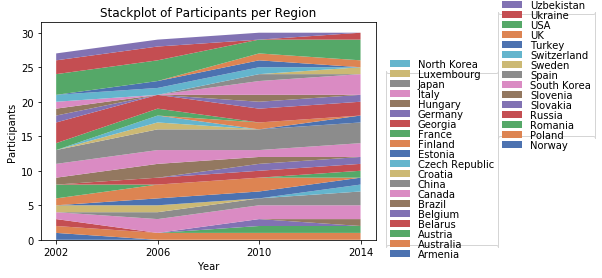

In [35]:
plt.stackplot(f_ppy.pivot('Year','region','Name').index, np.transpose(f_ppy.pivot('Year','region', 'Name').fillna(0)))
l1 = plt.legend(bbox_to_anchor=(1.38, 0), labels = f_ppy.pivot('Year','region','Name').columns[0:20], labelspacing = -2)
l2 = plt.legend(bbox_to_anchor=(1.67,0.5), labels = f_ppy.pivot('Year', 'region', 'Name').columns[20:35], labelspacing = -2)
plt.gca().add_artist(l1)
plt.xlabel('Year')
plt.xticks([2002, 2006, 2010, 2014])
plt.ylabel('Participants')
plt.title('Stackplot of Participants per Region')
plt.show()

For women, we see USA, Russia, Canada, and Japan that are able to send more than one athlete per Olympics. However, unlike the male teams, we see other countries such as China, Uzbekistan, and Australia that are more consistently able to compete in this event. 